# Machine Learning Question: 
How can we predict adaptability in online education based on certain characteristics of Students using Supervised Machine Learning modals?

In [1]:
#Import library
import pandas as pd

In [2]:
#Importing data set
df= pd.read_csv('students.csv')

In [3]:
#Display first five rows
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
#Display Last five rows
df.tail()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1204,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate


In [5]:
#Display number of columns, rows and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [6]:
#Display is we have null values in our data
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

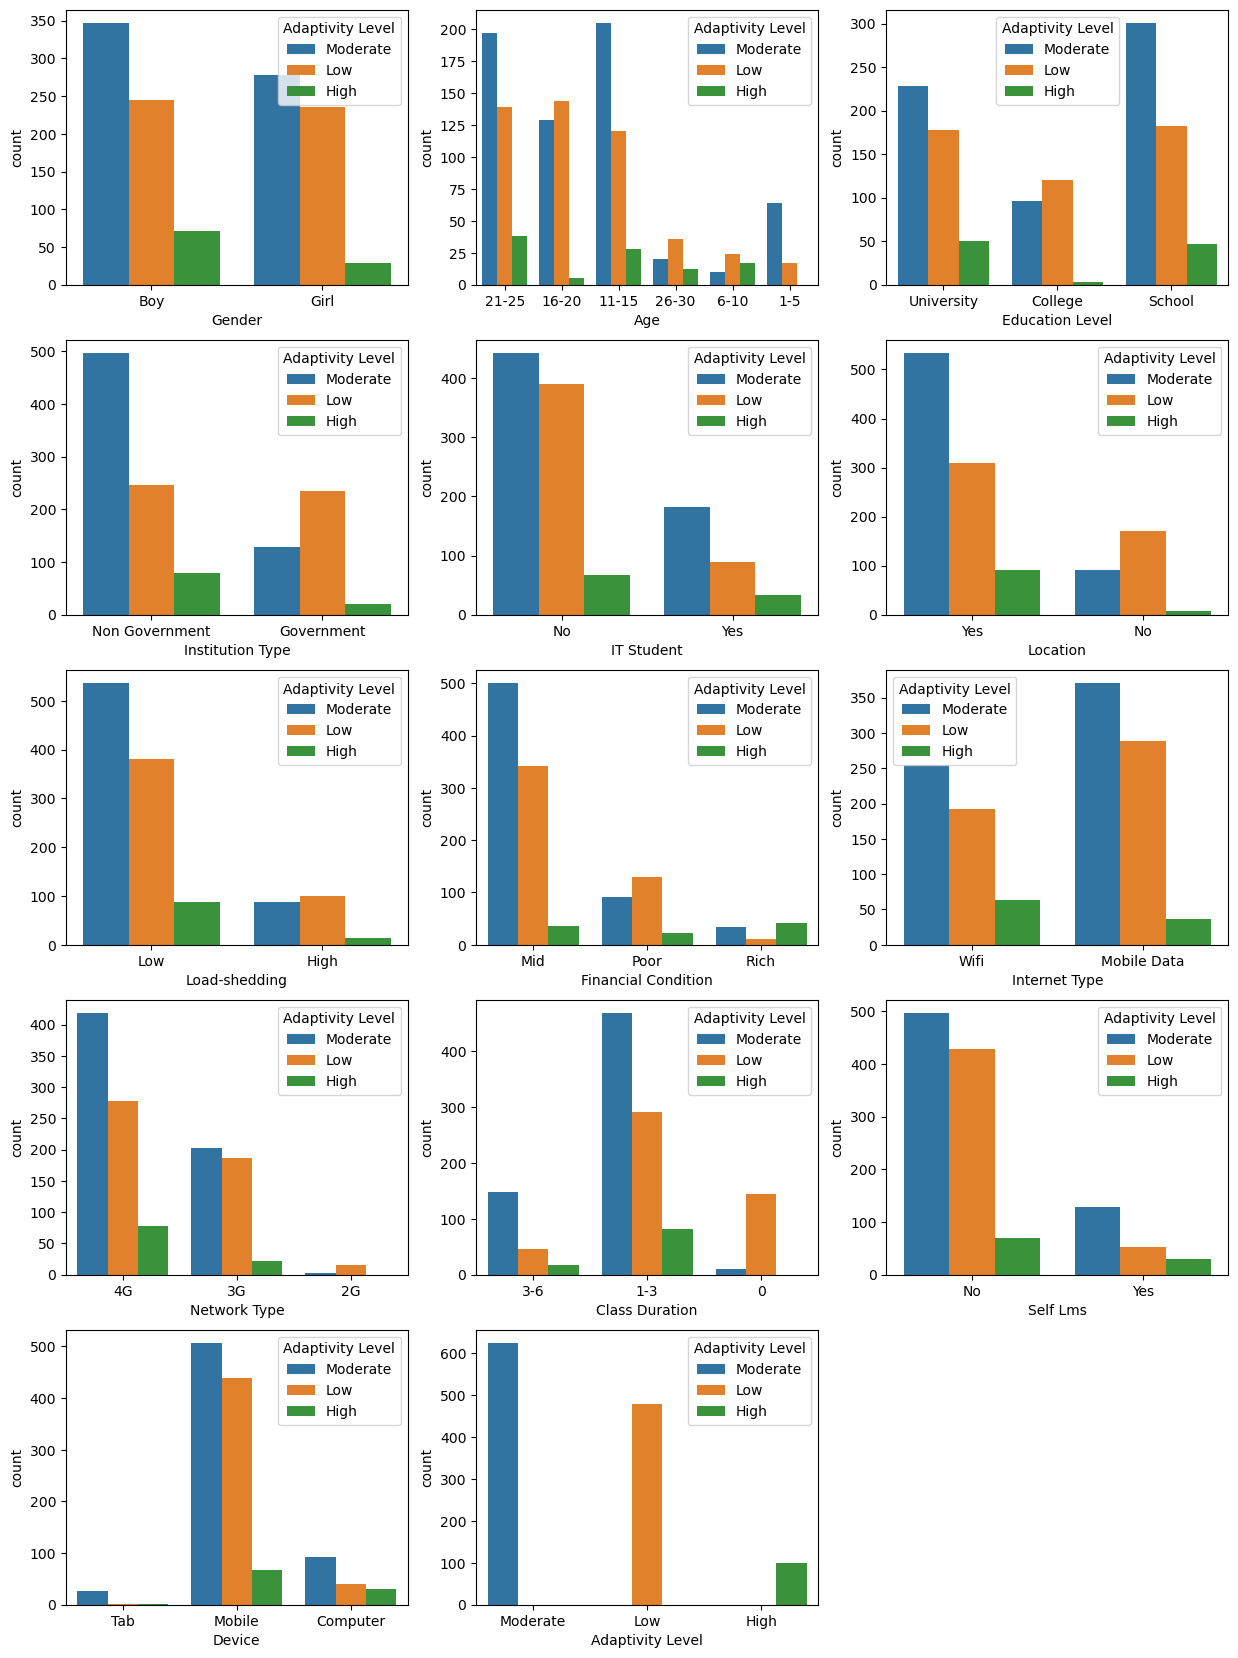

In [7]:
#Display plot features vs target
import matplotlib.pyplot as plt
import seaborn as sns
i = 1
plt.figure(figsize = (15,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature, hue='Adaptivity Level', data = df)
    i +=1

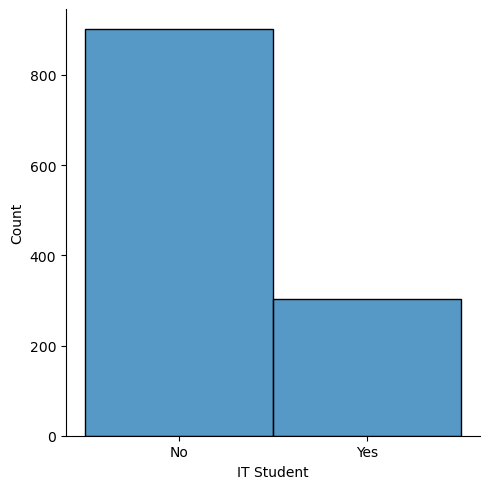

In [8]:
#Display plot so we can see in this case we have more no than yes
import warnings
warnings.filterwarnings('ignore')
sns.displot(data= df, x ='IT Student')

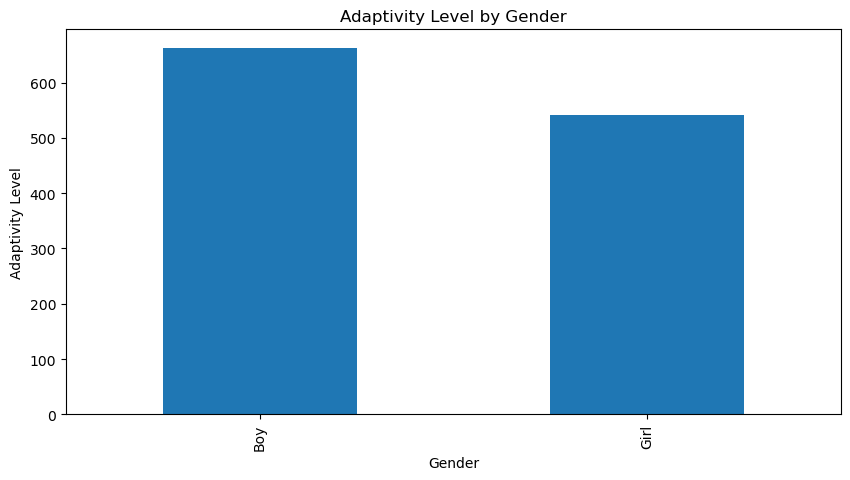

In [9]:
#Display histogram to see distribution
df.Gender.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5)) 
plt.title("Adaptivity Level by Gender") 
plt.ylabel('Adaptivity Level') 
plt.xlabel('Gender');

Text(0.5, 1.0, 'number of Moderate_0 vs Low_1 vs High_2')

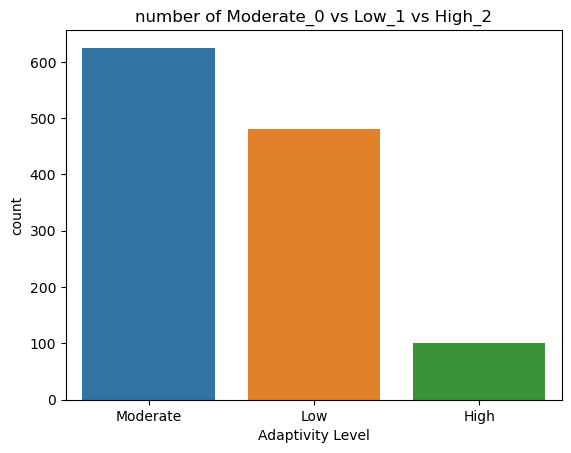

In [10]:
# visualizing adaptivity level column >>> 'moderate':0,'low':1, 'High':2
sns.countplot(x='Adaptivity Level',data = df)
plt.title('number of Moderate_0 vs Low_1 vs High_2')

In [11]:
#Display the components in our dependable values
df['Adaptivity Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [12]:
#Replacing qualitative values for quantitative
import warnings
warnings.filterwarnings('ignore')
df['Adaptivity Level'].replace('Moderate', 0, inplace = True)
df['Adaptivity Level'].replace('Low', 1, inplace = True)
df['Adaptivity Level'].replace('High', 2, inplace = True)

In [13]:
#Display replaced values
df['Adaptivity Level'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
#Display number of columns and rows
df.shape

(1205, 14)

In [15]:
#Define values for dependable and independable variables
X = df.iloc[:,0:13]
y = df.iloc[:,13]

print(X.shape)
print(y.shape)

print(X.columns)

(1205, 13)
(1205,)
Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device'],
      dtype='object')


In [16]:
#Display columns and rows for X and rows for y
X.shape, y.shape

((1205, 13), (1205,))

In [17]:
#Replaced qualitatives values for quantitatives in X
X = pd.get_dummies(X)

X.head()

,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,...,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,True,False,False,False,True
1,False,True,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,False,True,False,False,True,False,False,False,True,False,...,False,True,False,True,False,True,False,False,True,False
3,False,True,False,True,False,False,False,False,False,True,...,False,True,False,True,False,True,False,False,True,False
4,False,True,False,False,True,False,False,False,False,True,...,True,False,True,False,False,True,False,False,True,False


In [18]:
#Splitting the data for train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((903, 35), (903,), (302, 35), (302,))

In [19]:
#Standardize X values using Standar Scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.096558,1.096558,-0.264396,1.531158,-0.545357,-0.660009,-0.244661,-0.220863,-0.472840,1.106408,...,1.386481,-1.340024,-0.39148,0.675612,-0.46933,0.444537,-0.444537,-0.397105,0.433772,-0.150499
1,-1.096558,1.096558,-0.264396,-0.653101,1.833663,-0.660009,-0.244661,-0.220863,2.114882,-0.903826,...,-0.721250,0.746255,-0.39148,0.675612,-0.46933,0.444537,-0.444537,-0.397105,0.433772,-0.150499
2,-1.096558,1.096558,3.782206,-0.653101,-0.545357,-0.660009,-0.244661,-0.220863,-0.472840,1.106408,...,-0.721250,0.746255,-0.39148,0.675612,-0.46933,0.444537,-0.444537,-0.397105,0.433772,-0.150499
3,-1.096558,1.096558,-0.264396,1.531158,-0.545357,-0.660009,-0.244661,-0.220863,-0.472840,1.106408,...,1.386481,-1.340024,-0.39148,0.675612,-0.46933,0.444537,-0.444537,-0.397105,0.433772,-0.150499
4,0.911945,-0.911945,-0.264396,1.531158,-0.545357,-0.660009,-0.244661,-0.220863,-0.472840,1.106408,...,-0.721250,0.746255,-0.39148,0.675612,-0.46933,0.444537,-0.444537,-0.397105,0.433772,-0.150499


# Artificial Neural Networks model

In [20]:
#Import Libraries
import numpy as np
import random
import tensorflow
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [21]:
#Import libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

sqt = Sequential()

In [22]:
# Add the first hidden layer:
from keras.layers import Dense

# Add the first hidden layer
sqt.add(Dense(42, activation = 'relu', input_dim = 35))

In [23]:
# Add our second hidden layer:
# Add the second hidden layer
sqt.add(Dense(21, activation = 'relu'))

In [24]:
# Now we add the output layer as follows:
# Add the output layer
sqt.add(Dense(1, activation = 'sigmoid'))

In [25]:
sqt.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [26]:
# To train our MLP model defined in earlier steps, let's call the fit function. Let's train our model for 200 iterations:
# Train the model for 200 epochs
sqt.fit(X_train, y_train, epochs = 200)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5384 - loss: 0.6975
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6168 - loss: 0.5821
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.5068
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - loss: 0.4343
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.3673
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6744 - loss: 0.3044
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - loss: 0.2428
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6910 - loss: 0.1800
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - loss: 0.1157
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - loss: 0.0452
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6582 - loss: -0.0332
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7177 - loss: -94.0495
Epoch 69/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7103 - loss: -98.2833
Epoch 70/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: -102.5746
Epoch 71/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7076 - loss: -107.0998
Epoch 72/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7135 - loss: -111.5975
Epoch 73/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: -116.3193
Epoch 74/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7107 - loss: -121.0268
Epoch 75/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7106 - loss: -126.0604
Epoch 76/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7105 - loss: -130.9676
Epoch 77/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: -136.2474
Epoch 78/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: -141.5632
Epoch 79/200
29/29 ━━━━━━━━━━━━━━━━━

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6991 - loss: -657.1307 
Epoch 135/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: -670.7073  
Epoch 136/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: -684.2321 
Epoch 137/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6974 - loss: -697.9869
Epoch 138/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: -712.0667 
Epoch 139/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7142 - loss: -726.1437  
Epoch 140/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7046 - loss: -740.6657 
Epoch 141/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6957 - loss: -755.1450 
Epoch 142/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7152 - loss: -769.8900 
Epoch 143/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: -784.5860 
Epoch 144/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6991 - loss: -799.5202 
Epoch 145/20

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7127 - loss: -1867.6279 
Epoch 200/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7178 - loss: -1893.0284


In [27]:
#Display accuracy for train and test
scores = sqt.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = sqt.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: -1688.2307
Training Accuracy: 72.76%

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: -806.1403 
Testing Accuracy: 65.56%



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


Text(50.722222222222214, 0.5, 'Actual')

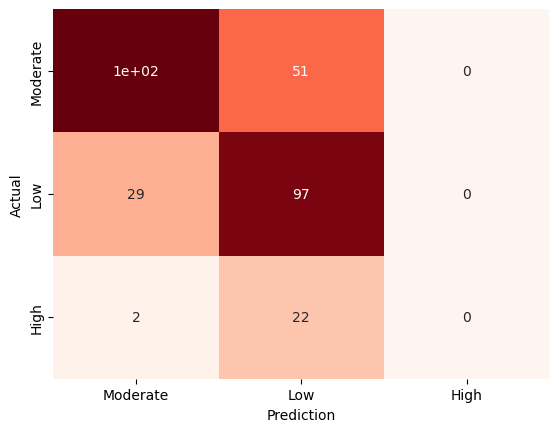

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = sqt.predict(X_test)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
ax = sns.heatmap(c_matrix, annot=True,                  
                 xticklabels=['Moderate','Low', 'High'],                
                 yticklabels=['Moderate','Low', 'High'],                  
                 cbar=False, cmap='Reds')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [29]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

[[142   7   3]
 [  8 117   1]
 [  4   0  20]]
Accuracy: 0.92


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       152
           1       0.94      0.93      0.94       126
           2       0.83      0.83      0.83        24

    accuracy                           0.92       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.92      0.92      0.92       302



In [32]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.89010989 0.83516484 0.91208791 0.86666667 0.9        0.95555556
 0.94444444 0.84444444 0.81111111 0.91111111] 
 Mean Accuracy : 0.887069597069597 
Standard Deviation : 0.04478786432656145


# Support Vector Machine

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[133  19   0]
 [ 18 107   1]
 [ 11   0  13]]
Accuracy: 0.8377483443708609


In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Predict the response for test dataset
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       152
           1       0.85      0.85      0.85       126
           2       0.93      0.54      0.68        24

    accuracy                           0.84       302
   macro avg       0.87      0.76      0.79       302
weighted avg       0.84      0.84      0.84       302



In [35]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.75824176 0.69230769 0.75824176 0.74444444 0.85555556 0.83333333
 0.9        0.72222222 0.8        0.81111111] 
 Mean Accuracy : 0.7875457875457875 
Standard Deviation : 0.06082010415190392


# Compare modal with 25% testing.

In [36]:
scores = sqt.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = sqt.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
print ("training set score Decission Tree: {:.2F}".format(clf.score(X_train, y_train)))
print("test set score Decision Tree: {:.2f}".format (clf.score(X_test, y_test)))
print ("training set score Support Vector Machine: {:.2f}".format(svc.score(X_train, y_train)))
print("test set score Support Vector Machine: {:.2f}".format(svc.score(X_test, y_test)))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7129 - loss: -1688.2307 
Training Accuracy: 72.76%

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6696 - loss: -806.1403 
Testing Accuracy: 65.56%

training set score Decission Tree: 0.93
test set score Decision Tree: 0.92
training set score Support Vector Machine: 0.86
test set score Support Vector Machine: 0.84


In [37]:
#Splitting the data for train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((964, 35), (964,), (241, 35), (241,))

In [38]:
#Standardize X values using Standar Scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.908712,-0.908712,-0.264428,1.539685,-0.537373,-0.675421,-0.238783,-0.221283,-0.461062,1.112052,...,-0.714823,0.741511,-0.385988,0.67868,-0.47752,0.449439,-0.449439,-0.408742,0.447770,-0.15634
1,0.908712,-0.908712,-0.264428,-0.649484,1.860904,-0.675421,-0.238783,-0.221283,2.168903,-0.899239,...,-0.714823,0.741511,-0.385988,0.67868,-0.47752,0.449439,-0.449439,-0.408742,0.447770,-0.15634
2,-1.100459,1.100459,-0.264428,-0.649484,1.860904,-0.675421,-0.238783,-0.221283,-0.461062,-0.899239,...,1.398948,-1.348597,-0.385988,0.67868,-0.47752,0.449439,-0.449439,-0.408742,0.447770,-0.15634
3,0.908712,-0.908712,-0.264428,1.539685,-0.537373,-0.675421,-0.238783,-0.221283,-0.461062,1.112052,...,1.398948,-1.348597,-0.385988,0.67868,-0.47752,0.449439,-0.449439,-0.408742,0.447770,-0.15634
4,0.908712,-0.908712,-0.264428,-0.649484,-0.537373,1.480558,-0.238783,-0.221283,-0.461062,-0.899239,...,-0.714823,0.741511,-0.385988,0.67868,-0.47752,0.449439,-0.449439,2.446530,-2.233289,-0.15634


# Artificial Network

In [39]:
# Add the first hidden layer:
from keras.layers import Dense

# Add the first hidden layer
sqt.add(Dense(42, activation = 'relu', input_dim = 35))

In [40]:
# Add our second hidden layer:
# Add the second hidden layer
sqt.add(Dense(21, activation = 'relu'))

In [41]:
# Now we add the output layer as follows:
# Add the output layer
sqt.add(Dense(1, activation = 'sigmoid'))

In [42]:
sqt.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [43]:
# To train our MLP model defined in earlier steps, let's call the fit function. Let's train our model for 200 iterations:
# Train the model for 200 epochs
sqt.fit(X_train, y_train, epochs = 200)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4234 - loss: 0.6388
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5119 - loss: 0.5893
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.5398
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 0.5075
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.4943
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.4853
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.4646
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.4585
Epoch 9/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.4547
Epoch 10/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4505
Epoch 11/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - loss: 0.4486
Epoch 12/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 70/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 71/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 72/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 73/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 74/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 75/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 76/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 77/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 78/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 79/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 80/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 138/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 139/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 140/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 141/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 142/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 143/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 144/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 145/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 146/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 147/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.4488
Epoch 148/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

In [44]:
#Display accuracy for train and test
scores = sqt.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = sqt.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6914 - loss: 0.3536
Training Accuracy: 70.54%

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - loss: 0.6312 
Testing Accuracy: 64.73%



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Text(50.722222222222214, 0.5, 'Actual')

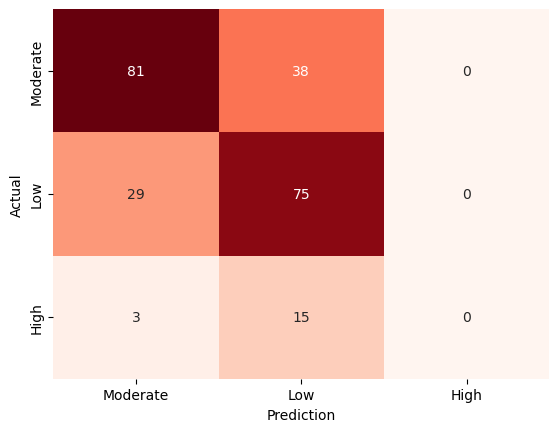

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = sqt.predict(X_test)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(3) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
ax = sns.heatmap(c_matrix, annot=True,                  
                 xticklabels=['Moderate','Low', 'High'],                
                 yticklabels=['Moderate','Low', 'High'],                  
                 cbar=False, cmap='Reds')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [46]:

from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


cm = confusion_matrix(y_test, y_pred)
print(cm)

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )


[[108   8   3]
 [  8  96   0]
 [  3   1  14]]
Accuracy: 0.90


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       119
           1       0.91      0.92      0.92       104
           2       0.82      0.78      0.80        18

    accuracy                           0.90       241
   macro avg       0.88      0.87      0.88       241
weighted avg       0.90      0.90      0.90       241



In [48]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.90721649 0.86597938 0.90721649 0.89690722 0.92708333 0.91666667
 0.9375     0.85416667 0.82291667 0.91666667] 
 Mean Accuracy : 0.8952319587628864 
Standard Deviation : 0.03432437682220995


# Support Vector Machine

In [49]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[105  14   0]
 [ 11  93   0]
 [  8   1   9]]
Accuracy: 0.8589211618257261


In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Predict the response for test dataset
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       119
           1       0.86      0.89      0.88       104
           2       1.00      0.50      0.67        18

    accuracy                           0.86       241
   macro avg       0.90      0.76      0.80       241
weighted avg       0.86      0.86      0.86       241



In [51]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.80412371 0.75257732 0.75257732 0.78350515 0.88541667 0.8125
 0.89583333 0.76041667 0.78125    0.8125    ] 
 Mean Accuracy : 0.8040700171821304 
Standard Deviation : 0.04830340904641645


# Compare models with 20% testing

In [52]:
scores = sqt.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = sqt.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
print ("training set score Decission Tree: {:.2F}".format(clf.score(X_train, y_train)))
print("test set score Decision Tree: {:.2f}".format (clf.score(X_test, y_test)))
print ("training set score Support Vector Machine: {:.2f}".format(svc.score(X_train, y_train)))
print("test set score Support Vector Machine: {:.2f}".format(svc.score(X_test, y_test)))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6914 - loss: 0.3536 
Training Accuracy: 70.54%

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - loss: 0.6312 
Testing Accuracy: 64.73%

training set score Decission Tree: 0.93
test set score Decision Tree: 0.90
training set score Support Vector Machine: 0.87
test set score Support Vector Machine: 0.86


In [53]:
#Splitting the data for train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((843, 35), (843,), (362, 35), (362,))

In [54]:
#Standardize X values using Standar Scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.098547,1.098547,-0.264191,-0.654839,1.835177,-0.662244,-0.242992,-0.217267,2.132147,-0.905944,...,-0.722261,0.747145,-0.395447,-1.468776,2.123630,0.438591,-0.438591,-0.395447,0.432809,-0.151849
1,0.910293,-0.910293,-0.264191,-0.654839,1.835177,-0.662244,-0.242992,-0.217267,-0.469011,-0.905944,...,1.384541,-1.338428,-0.395447,0.680839,-0.470892,-2.280028,2.280028,2.528782,-2.310486,-0.151849
2,-1.098547,1.098547,-0.264191,-0.654839,-0.544906,-0.662244,-0.242992,4.602631,-0.469011,1.103821,...,1.384541,-1.338428,-0.395447,0.680839,-0.470892,0.438591,-0.438591,-0.395447,0.432809,-0.151849
3,0.910293,-0.910293,-0.264191,-0.654839,1.835177,-0.662244,-0.242992,-0.217267,2.132147,-0.905944,...,-0.722261,0.747145,-0.395447,0.680839,-0.470892,0.438591,-0.438591,-0.395447,0.432809,-0.151849
4,-1.098547,1.098547,-0.264191,-0.654839,1.835177,-0.662244,-0.242992,-0.217267,2.132147,-0.905944,...,-0.722261,0.747145,-0.395447,0.680839,-0.470892,0.438591,-0.438591,-0.395447,0.432809,-0.151849


# Artificial Network

In [55]:
# Add the first hidden layer:
from keras.layers import Dense

# Add the first hidden layer
sqt.add(Dense(42, activation = 'relu', input_dim = 35))

In [56]:
# Add our second hidden layer:
# Add the second hidden layer
sqt.add(Dense(21, activation = 'relu'))

In [57]:
# Now we add the output layer as follows:
# Add the output layer
sqt.add(Dense(1, activation = 'sigmoid'))

In [58]:
sqt.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [59]:
# To train our MLP model defined in earlier steps, let's call the fit function. Let's train our model for 200 iterations:
# Train the model for 200 epochs
sqt.fit(X_train, y_train, epochs = 200)

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4184 - loss: 0.6778
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4053 - loss: 0.6298
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4053 - loss: 0.5922
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4098 - loss: 0.5516
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7401 - loss: 0.4997
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.4588
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7419 - loss: 0.4292
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.4101
Epoch 9/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3912
Epoch 10/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3746
Epoch 11/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3590
Epoch 12/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3110
Epoch 70/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 71/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 72/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 73/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 74/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 75/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 76/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 77/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 78/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 79/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3109
Epoch 80/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 138/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 139/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3107
Epoch 140/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 141/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 142/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 143/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 144/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 145/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 146/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 147/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.3108
Epoch 148/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

In [60]:
#Display accuracy for train and test
scores = sqt.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = sqt.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7107 - loss: 0.3630
Training Accuracy: 73.07%

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6745 - loss: 0.5301 
Testing Accuracy: 67.40%



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Text(50.722222222222214, 0.5, 'Actual')

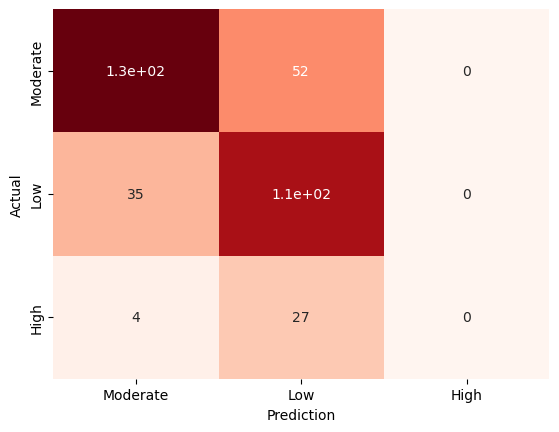

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = sqt.predict(X_test)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
ax = sns.heatmap(c_matrix, annot=True,                  
                 xticklabels=['Moderate','Low', 'High'],                
                 yticklabels=['Moderate','Low', 'High'],                  
                 cbar=False, cmap='Reds')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [63]:
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred)
print(cm)

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
# Model Accuracy, how often is the classifier correct

[[169  11   3]
 [ 12 135   1]
 [  7   0  24]]
Accuracy: 0.91


In [64]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       183
           1       0.92      0.91      0.92       148
           2       0.86      0.77      0.81        31

    accuracy                           0.91       362
   macro avg       0.89      0.87      0.88       362
weighted avg       0.91      0.91      0.91       362



In [65]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.84705882 0.89411765 0.88235294 0.9047619  0.88095238 0.97619048
 0.92857143 0.82142857 0.83333333 0.86904762] 
 Mean Accuracy : 0.8837815126050421 
Standard Deviation : 0.04370487619641638


# Support Vector Machine

In [66]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[159  23   1]
 [ 28 119   1]
 [ 15   2  14]]
Accuracy: 0.8066298342541437


In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Predict the response for test dataset
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       183
           1       0.83      0.80      0.82       148
           2       0.88      0.45      0.60        31

    accuracy                           0.81       362
   macro avg       0.83      0.71      0.75       362
weighted avg       0.81      0.81      0.80       362



In [68]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.76470588 0.71764706 0.76470588 0.86904762 0.8452381  0.86904762
 0.85714286 0.73809524 0.80952381 0.80952381] 
 Mean Accuracy : 0.804467787114846 
Standard Deviation : 0.05285289907094532


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.592 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.595 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.604 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.846 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.828 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.881 total time=   0.0s
[CV 5/5] END ....C=1000, gam

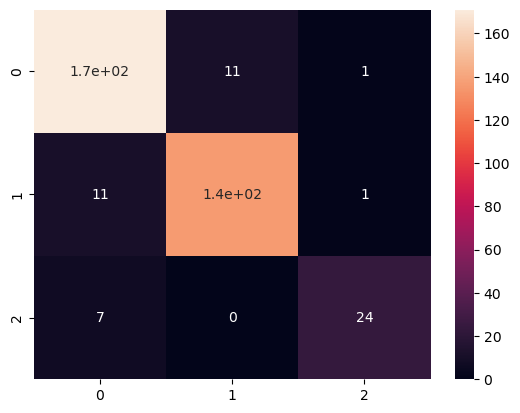

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [70]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))

Accuracy: 0.914364640883978


# Compare model with 30% testing

In [71]:
scores = sqt.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = sqt.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
print ("training set score Decission Tree: {:.2F}".format(clf.score(X_train, y_train)))
print("test set score Decision Tree: {:.2f}".format (clf.score(X_test, y_test)))
print ("training set score Support Vector Machine: {:.2f}".format(svc.score(X_train, y_train)))
print("test set score Support Vector Machine: {:.2f}".format(svc.score(X_test, y_test)))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7107 - loss: 0.3630
Training Accuracy: 73.07%

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - loss: 0.5301 
Testing Accuracy: 67.40%

training set score Decission Tree: 0.93
test set score Decision Tree: 0.91
training set score Support Vector Machine: 0.85
test set score Support Vector Machine: 0.81
